
# 🧪 Ejercicio práctico: Muestreo y Cuantización

Este notebook resuelve paso a paso los ejercicios propuestos en la materia **Técnicas de Procesamiento de Imágenes**, basándose en el análisis de muestreo y cuantización sobre imágenes digitales.


## Ejercicios prácticos

Exploración básica: Cambiar entre las imágenes disponibles (mandril.png y scale.png) modificando la variable nombre_imagen y observar las diferencias en los resultados.

Efectos del muestreo: Experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) y analizar:

* ¿Cómo afecta a la calidad visual de la imagen?
* ¿Cuánto se reduce el tamaño de la imagen con cada factor?
* ¿A partir de qué factor se hace notoria la pérdida de calidad?


Efectos de la cuantización: Probar con diferentes valores del factor_cuantizacion (32, 64, 128) y observar:

* ¿Cómo cambia la apariencia de la imagen?
* ¿Qué sucede con el histograma en cada caso?
* ¿En qué tipos de imágenes es más o menos notorio el efecto?

Reto de comprensión:

* ¿Qué ocurre si combinamos muestreo y cuantización en una misma imagen?
* ¿Qué proceso afecta más a la calidad percibida de la imagen?
* ¿Qué proceso permite mayor compresión de datos?

In [3]:
!pip install matplotlib opencv-python -q

You should consider upgrading via the 'c:\users\misse\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # si se usa en Colab


## 📥 Cargar imagen original

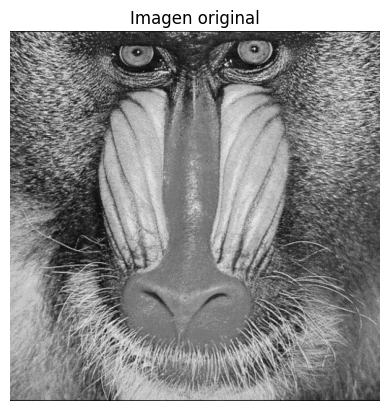

In [5]:

# Cambiar entre 'mandril.png' y 'scale.png'
nombre_imagen = 'mandril.png'  # también podés probar con 'scale.png'
imagen = cv2.imread(nombre_imagen, cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
plt.show()

# Guardar tamaño original
alto_original, ancho_original = imagen.shape


## 🔻 Muestreo: Reducción de resolución

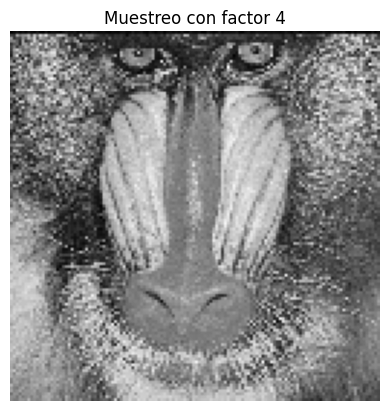

Reducción de datos: 93.75%


In [6]:

factor_muestreo = 4  # Probá con 2, 4, 8

imagen_muestreada = imagen[::factor_muestreo, ::factor_muestreo]

# Mostrar imagen reducida
plt.imshow(imagen_muestreada, cmap='gray')
plt.title(f'Muestreo con factor {factor_muestreo}')
plt.axis('off')
plt.show()

# Calcular porcentaje de reducción
pixels_original = alto_original * ancho_original
pixels_muestreados = imagen_muestreada.shape[0] * imagen_muestreada.shape[1]
reduccion = 100 * (1 - pixels_muestreados / pixels_original)

print(f'Reducción de datos: {reduccion:.2f}%')


## 🌗 Cuantización: Reducción de niveles de gris

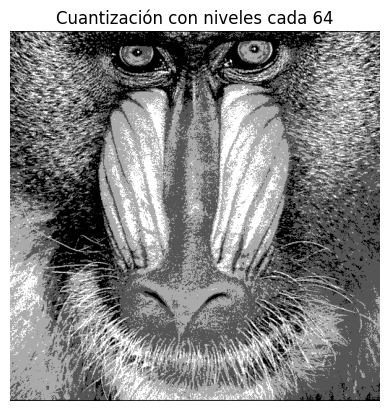

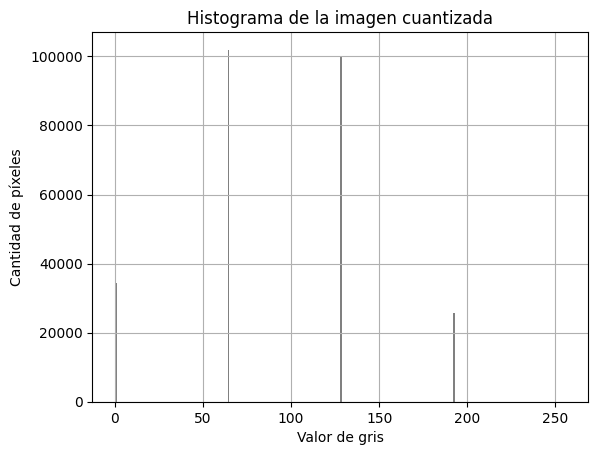

In [7]:

factor_cuantizacion = 64  # Probá con 32, 64, 128

imagen_cuantizada = (imagen // factor_cuantizacion) * factor_cuantizacion

# Mostrar imagen cuantizada
plt.imshow(imagen_cuantizada, cmap='gray')
plt.title(f'Cuantización con niveles cada {factor_cuantizacion}')
plt.axis('off')
plt.show()

# Histograma
plt.hist(imagen_cuantizada.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histograma de la imagen cuantizada')
plt.xlabel('Valor de gris')
plt.ylabel('Cantidad de píxeles')
plt.grid(True)
plt.show()


## 🧩 Combinación de muestreo + cuantización

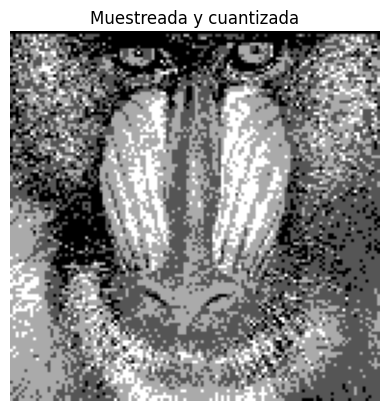

In [8]:

# Aplicar primero muestreo y luego cuantización
imagen_comb = (imagen_muestreada // factor_cuantizacion) * factor_cuantizacion

plt.imshow(imagen_comb, cmap='gray')
plt.title(f'Muestreada y cuantizada')
plt.axis('off')
plt.show()



## ✅ Conclusiones

- El muestreo reduce el tamaño de la imagen, afectando la nitidez.
- La cuantización reduce la cantidad de tonos posibles, generando pérdida de suavidad.
- La combinación de ambas operaciones acentúa la degradación visual.
- La elección de los factores depende del balance entre calidad percibida y compresión deseada.
